In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import requests

# Exercício 1)
- Consulte a Seção 12.9.4 da referência [61] e defina outliers conforme proposto por Tukey.

**RESPOSTA:**

Segundo Tukey, um outlier é definido como um valor que se desvia significativamente do restante dos dados. Especificamente, um outlier é qualquer valor que esteja:

1. **Acima** do terceiro quartil (Q3) por mais de 1,5 vezes o intervalo interquartil (IQR), que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1):
   
   $X > Q_3 + 1,5 \times (Q_3 - Q_1)$
   

2. **Abaixo** do primeiro quartil (Q1) por mais de 1,5 vezes o intervalo interquartil (IQR):
   
   $X < Q_1 - 1,5 \times (Q_3 - Q_1)$
   

Numa distribuição perfeitamente normal, apenas 0,7% dos valores de enquadram neste intervalo definido por Tukey.








# Exercício 2)
- Faça LCA.1 e LCA.2 do Apêndice A da referência [30] (https://moderndive.com/A-appendixA.html).

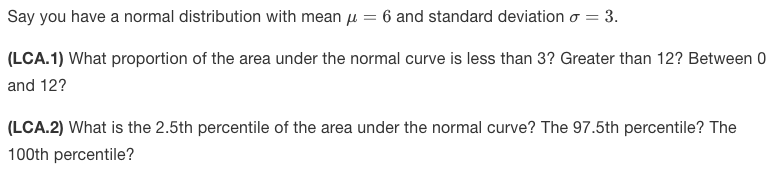

#### (LCA.1)

**RESPOSTA:**

Proporção de área da curva menor que 3: 0.1587
Proporção de área da curva maior que 12: 0.0228
Proporção de área da curva entre 0 e 12: 0.9545


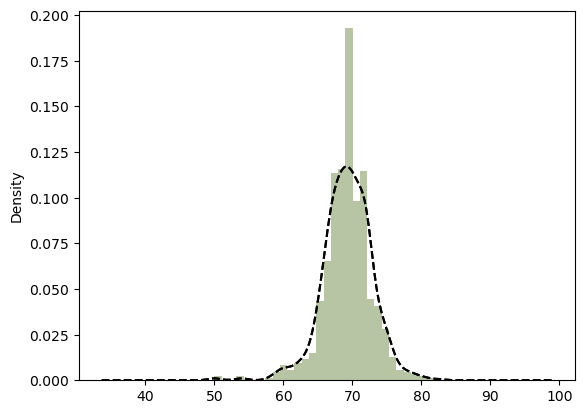

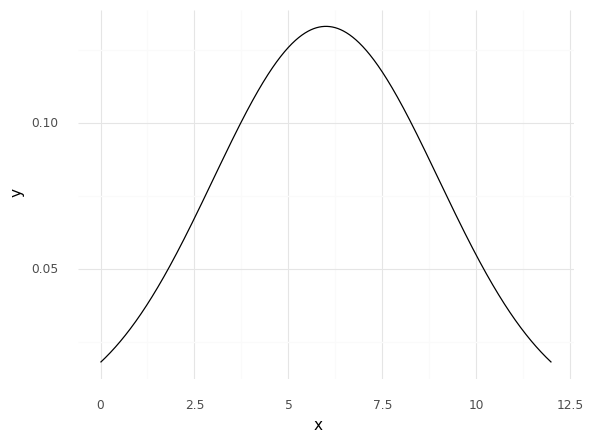

<ggplot: (398733954)>

In [82]:
from scipy.stats import norm

# Definindo a média e o desvio padrão
avg = 6
std = 3

# Calcula a proporção de área da curva menor que 3
prop_3 = norm.cdf(3, avg, std)
print(f'Proporção de área da curva menor que 3: {prop_3:.4f}')

# Calcula a proporção de área da curva maior que 12
prop_12 = 1 - norm.cdf(12, avg, std)
print(f'Proporção de área da curva maior que 12: {prop_12:.4f}')

# Calcula a proporção de área da curva entre 0 e 12
prop_0_12 = norm.cdf(12, avg, std) - norm.cdf(0, avg, std)
print(f'Proporção de área da curva entre 0 e 12: {prop_0_12:.4f}')

# printa a curva de distribuição 
x = np.linspace(0, 12, 1000)
y = norm.pdf(x, avg, std)
df = pd.DataFrame({'x': x, 'y': y})

(
    ggplot(df, aes(x='x', y='y')) +
    geom_line() +
    theme_minimal()
)





Um comentário interessante quanto a isso é que os 3 valores calculados estão de acordo com a "thumb rule" de uma distribuição normal conforme imagem abaixo.

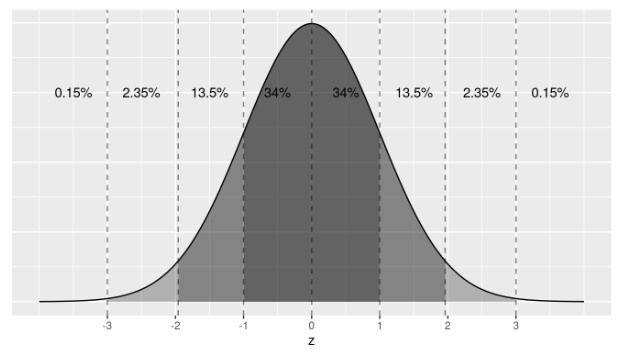

A proporçao de dados menores que 3 implica na média menos um desvio padrão, que pelo gráfico da cerca 13,5% + 2,35% + 0,15% = 15,87%.
Os dados acima de 12 implicam numa média somada de dois desvios padrão, resultando numa proporção de 2,35% + 0,15% = 2,50%
Os dados entre 0 e 12 estão num intervalo de 2 desvios padrão, resultando numa proporção de 13,5% + 34% + 34% + 13,5% = 95%

#### (LCA.2)

**RESPOSTA:**

In [87]:
# Calcula o percentil 2.5
p_2_5 = norm.ppf(0.025, avg, std)
print(f'Percentil 2.5: {p_2_5:.4f}')

# Calcula o percentil 97.5
p_97_5 = norm.ppf(0.975, avg, std)
print(f'Percentil 97.5: {p_97_5:.4f}')

# Calcula o percentil 100
p_100 = norm.ppf(1, avg, std)
print(f'Percentil 100: {p_100:.4f}')


Percentil 2.5: 0.1201
Percentil 97.5: 11.8799
Percentil 100: inf


Usando a regra prática, sabemos que o percentil de 2,5% corresponde à média subtraída de 2 desvios padrão, resultando em um valor próximo de 0, que está em linha com o valor calculado de 0,1201. Da mesma forma, o percentil de 97,5% corresponde à média somada de 2 desvios padrão, resultando em um valor próximo de 12, o que também condiz com o valor calculado de 11,8799. Por fim, o percentil de 100% tende ao infinito.

**Localização dos Datasets**
- https://vincentarelbundock.github.io/Rdatasets/datasets.html


## Resolva os itens da Seção 12.3 da referência [61], usando os conjuntos de dados do repositório 
- https://rafalab.dfci.harvard.edu/dsbook/


### Seção 12.3

#### 1)

In [4]:
# Baixa o dataset murders
url = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/murders.csv"
df_murders = pd.read_csv(url)
df_murders.head()

,rownames,state,abb,region,population,total
0,1,Alabama,AL,South,4779736,135
1,2,Alaska,AK,West,710231,19
2,3,Arizona,AZ,West,6392017,232
3,4,Arkansas,AR,South,2915918,93
4,5,California,CA,West,37253956,1257


In [5]:
# Printa as regioes
df_murders['region'].unique()

array(['South', 'West', 'Northeast', 'North Central'], dtype=object)

df_

#### 1)

In the murders dataset, the region is a categorical variable and the following is its distribution:



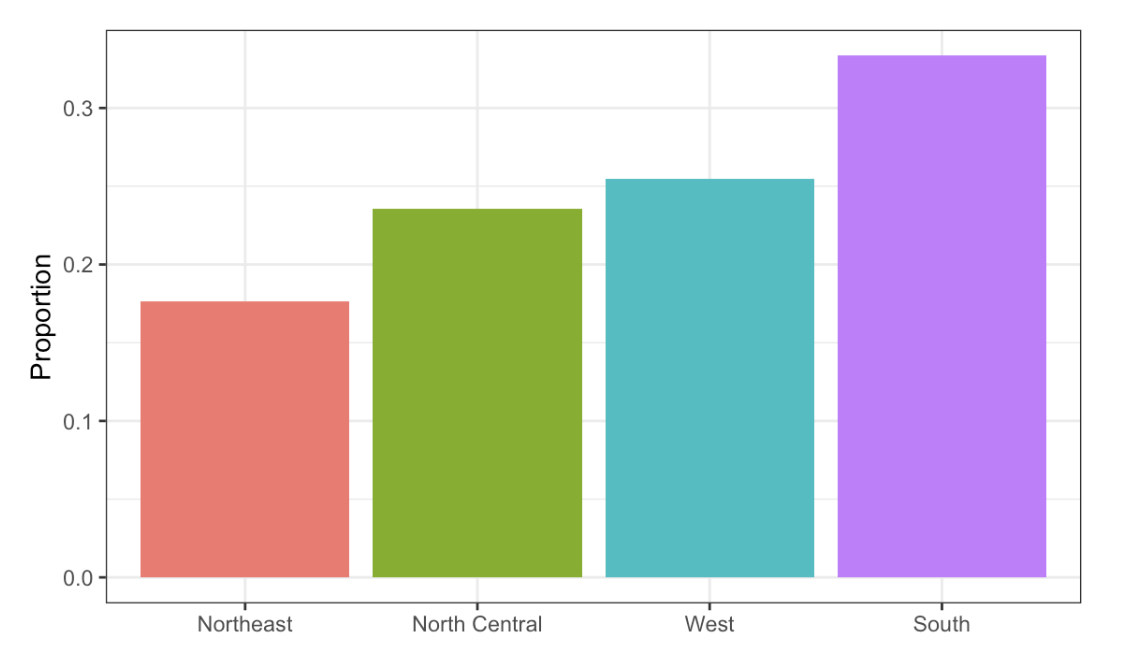

To the closest 5%, what proportion of the states are in the North Central region?

**RESPOSTA**

A região North Central está mais próxima do valor **25%** dentre os múltiplos de 5.

,region,total
0,North Central,1828
1,Northeast,1469
2,South,4195
3,West,1911


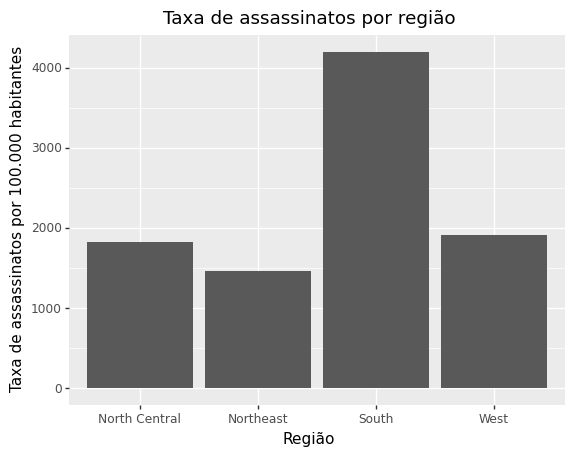

<ggplot: (395858960)>

In [12]:
# Plotando o gráfico igual ao do enunciado

# Calcula a proporçao de assassinatos por regiao
df_prop = df_murders.groupby('region').agg({'total': 'sum'}).reset_index()

display(df_prop)

# Plota o gráfico de barras com a taxa de assassinatos por região com o ggplot

(ggplot(df_murders, aes(x='region', y='total')) +
    geom_bar(stat='identity') +
    labs(title='Taxa de assassinatos por região', x='Região', y='Taxa de assassinatos por 100.000 habitantes'))


#### 2)
Which of the following is true:

a. The graph above is a histogram.

b. The graph above shows only four numbers with a bar plot.

c. Categories are not numbers, so it does not make sense to graph the distribution.

d. The colors, not the height of the bars, describe the distribution.


**RESPOSTA**

A alternativa correta é a **(b)**



#### 3)

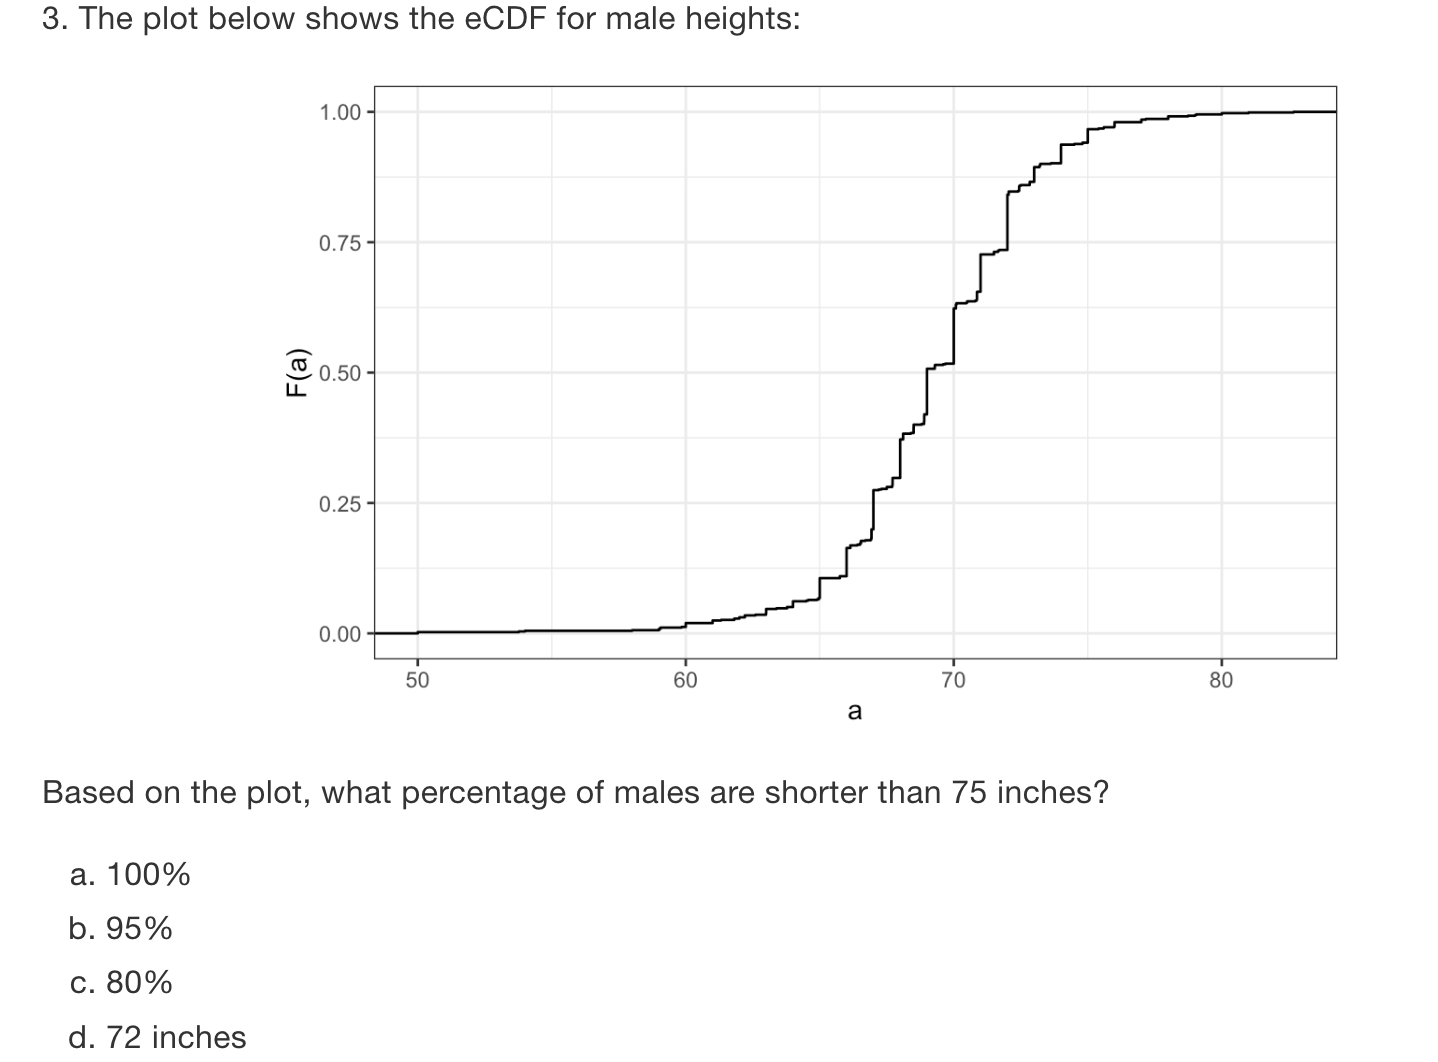

**RESPOSTA**

Alternativa **(b)**

#### 4)

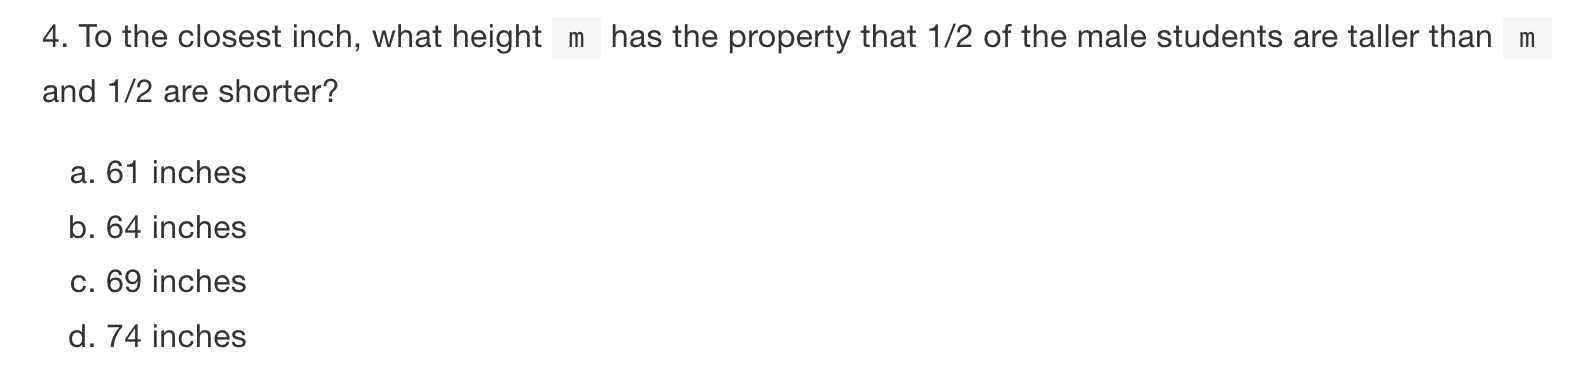

**RESPOSTA**

Alternativa **(c)**

#### 5)

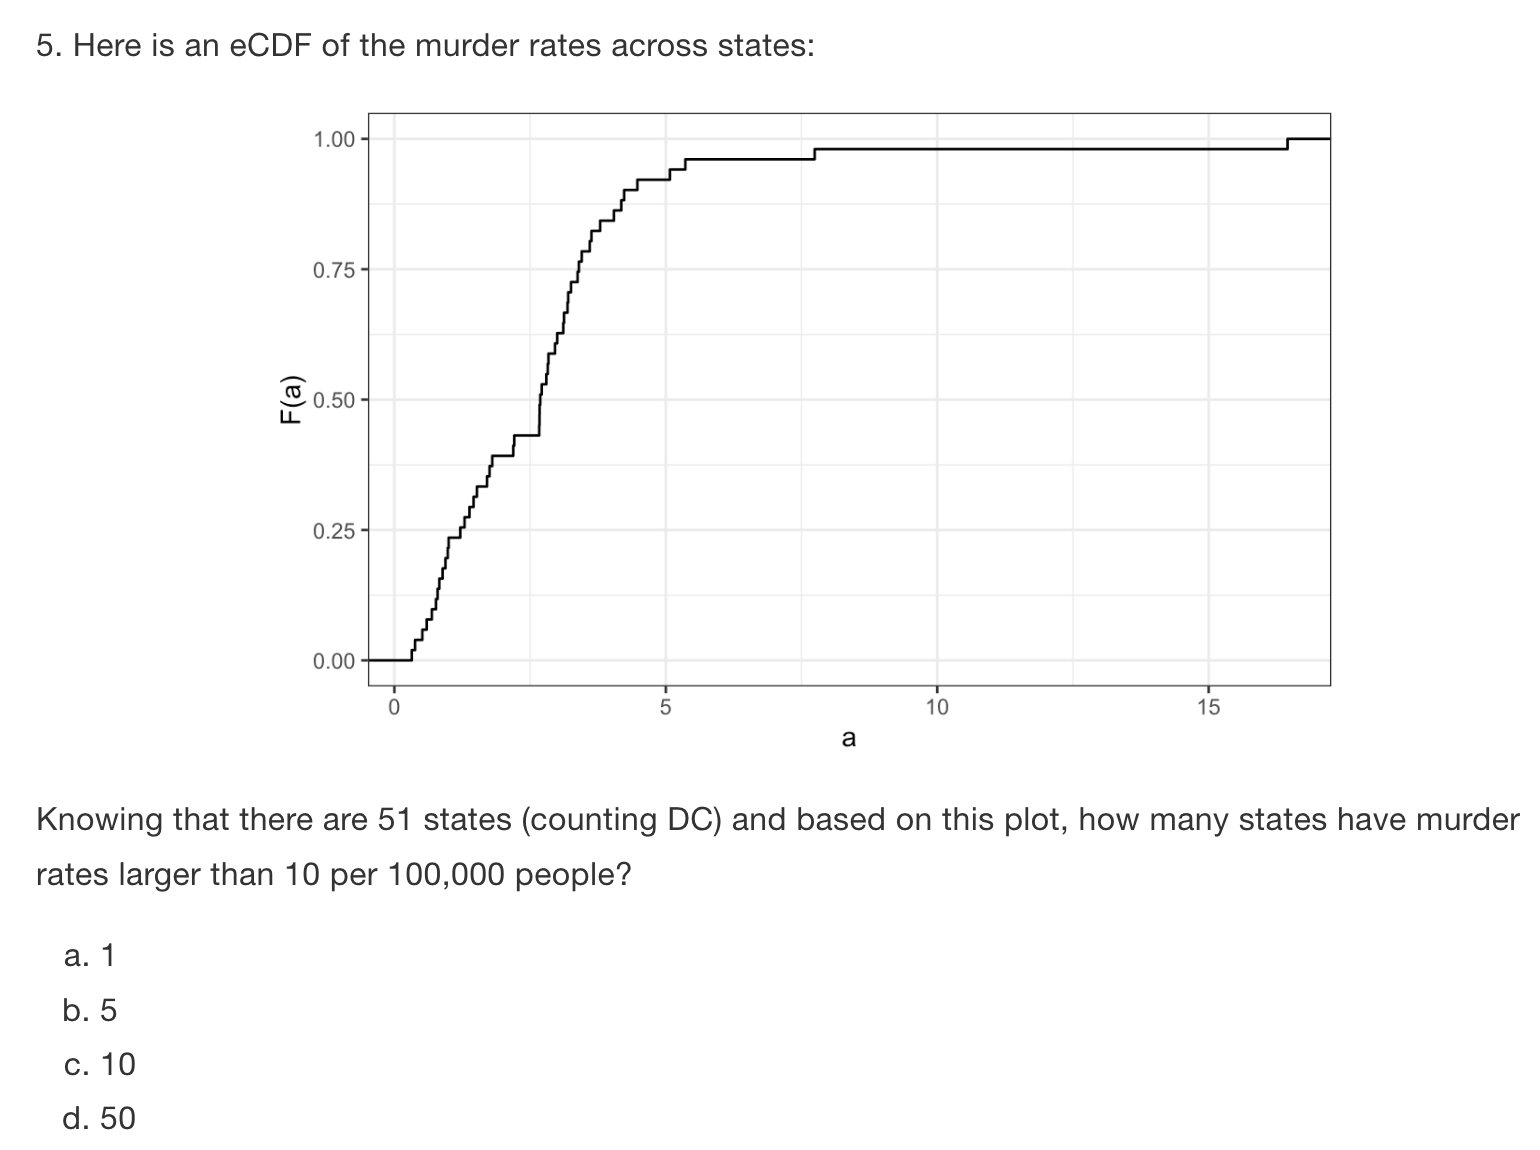

**RESPOSTA**

Alternativa **(a)**


#### 6)

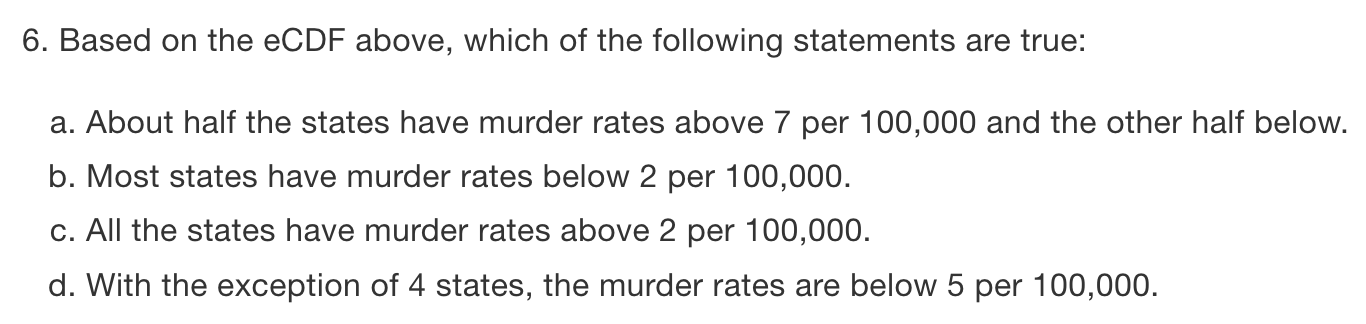

**RESPOSTA**

Alternativa **(d)**


#### 7)

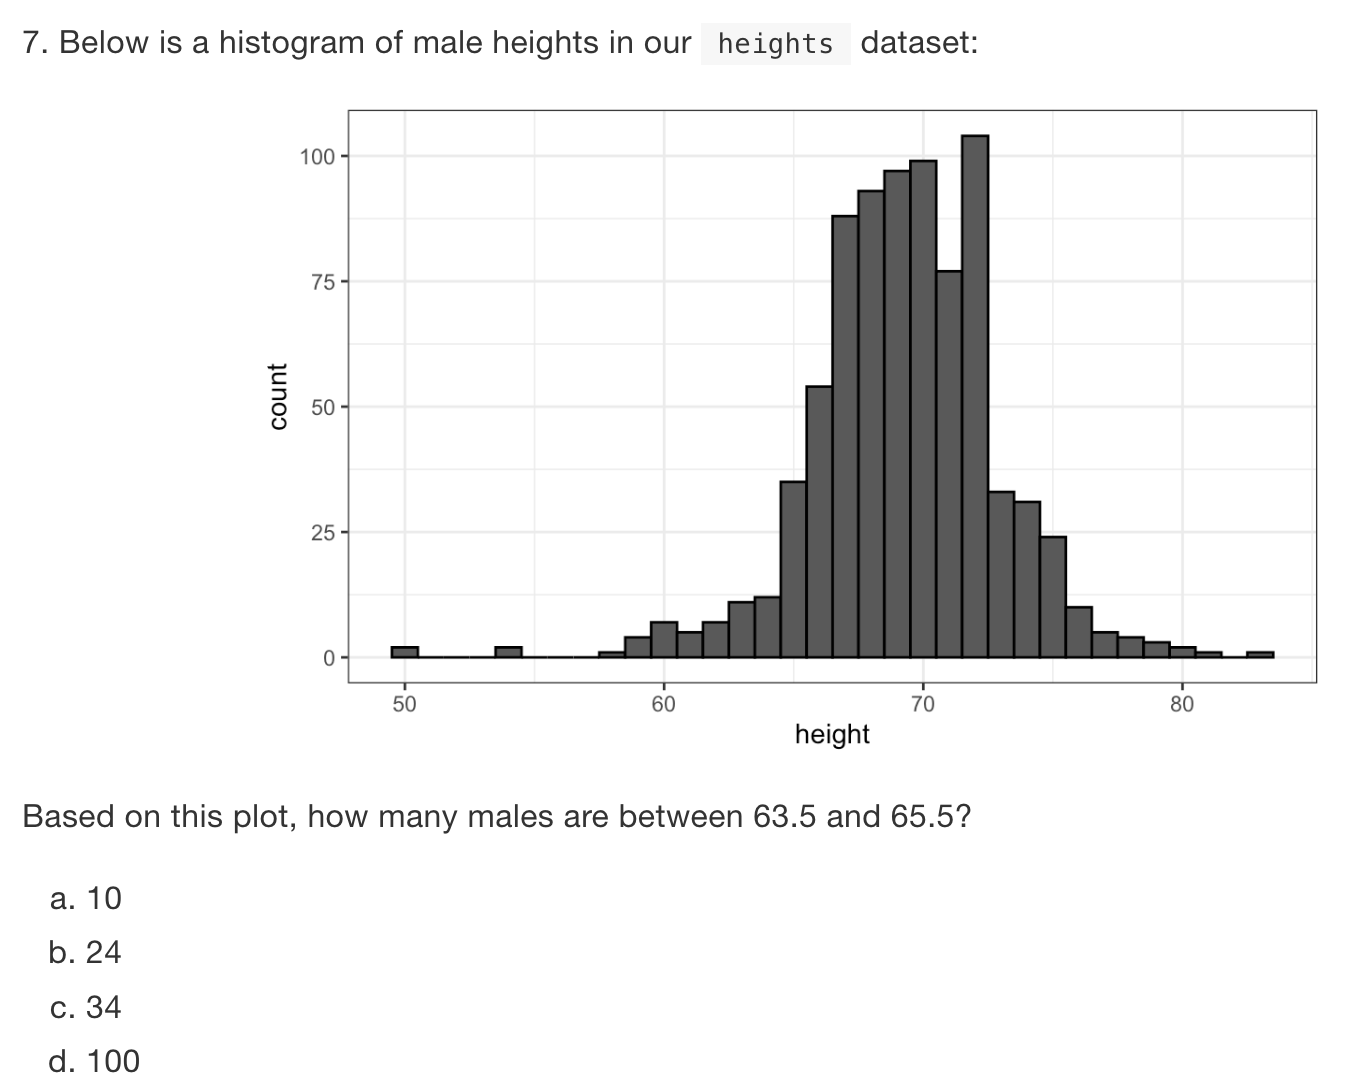

**RESPOSTA**

Alternativa **(d)**

#### 8)

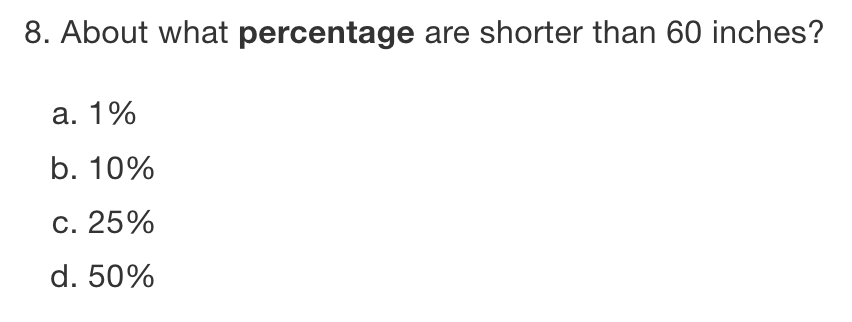

**RESPOSTA**

Alternativa **(a)**

#### 9)

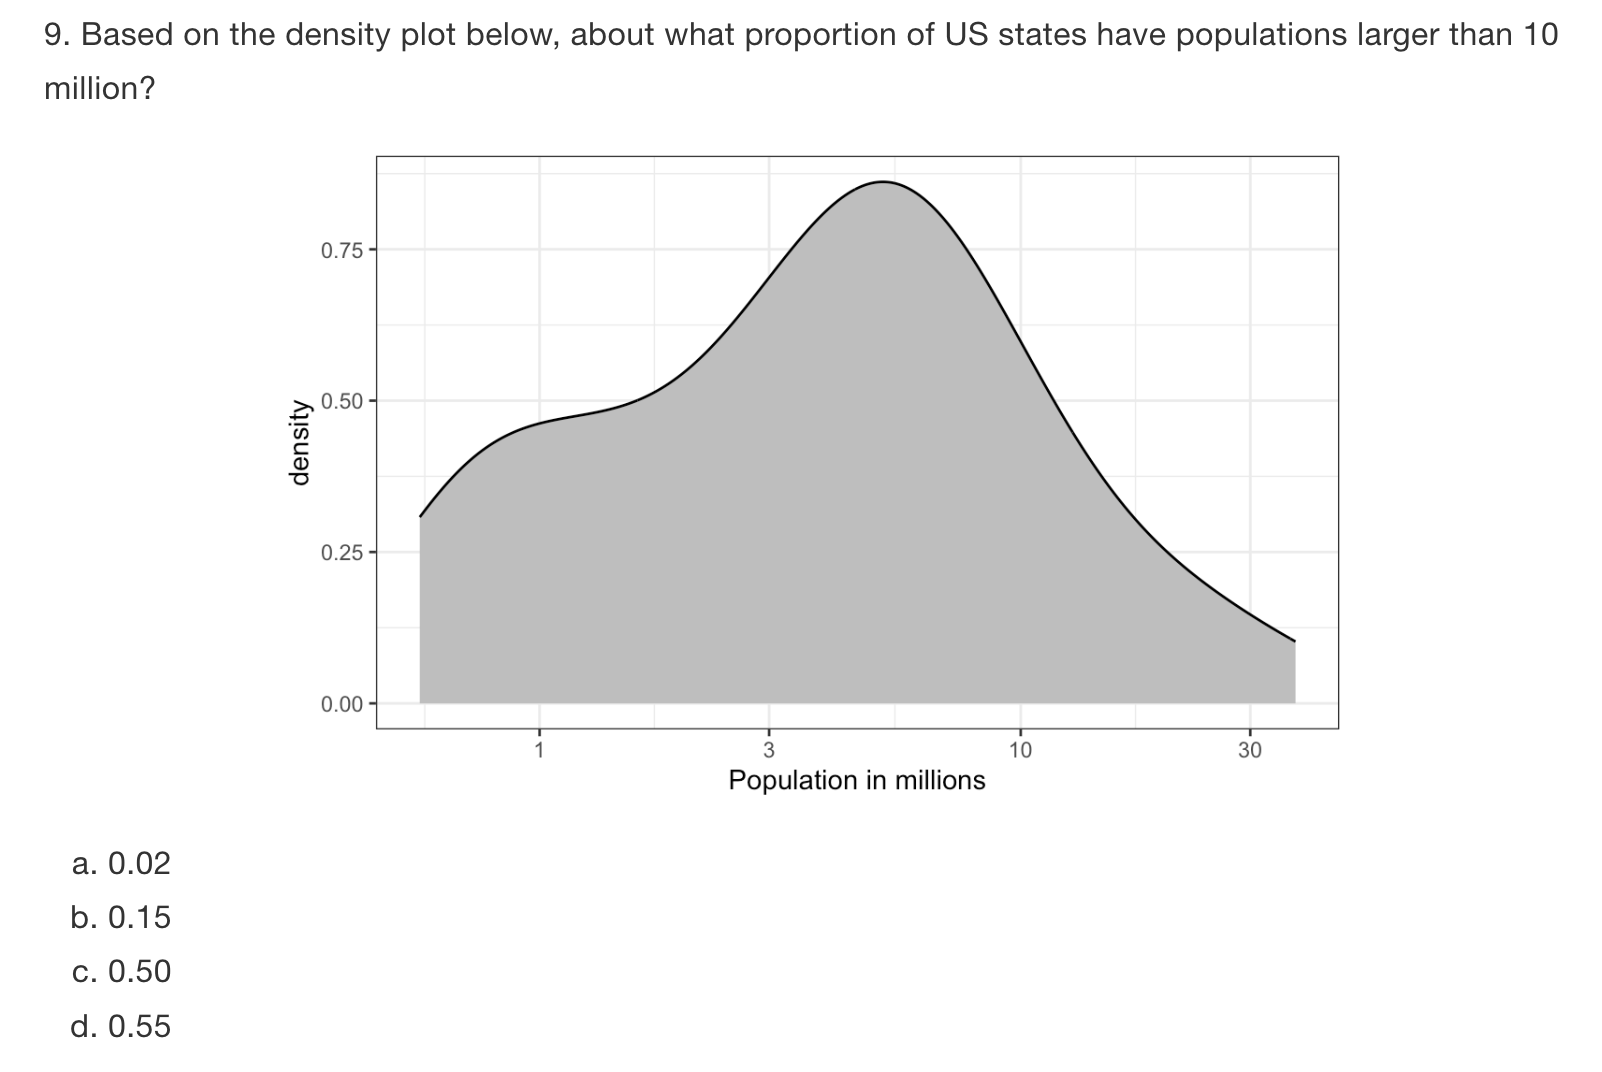

**RESPOSTA**

Alternativa **(d)**

#### 10)

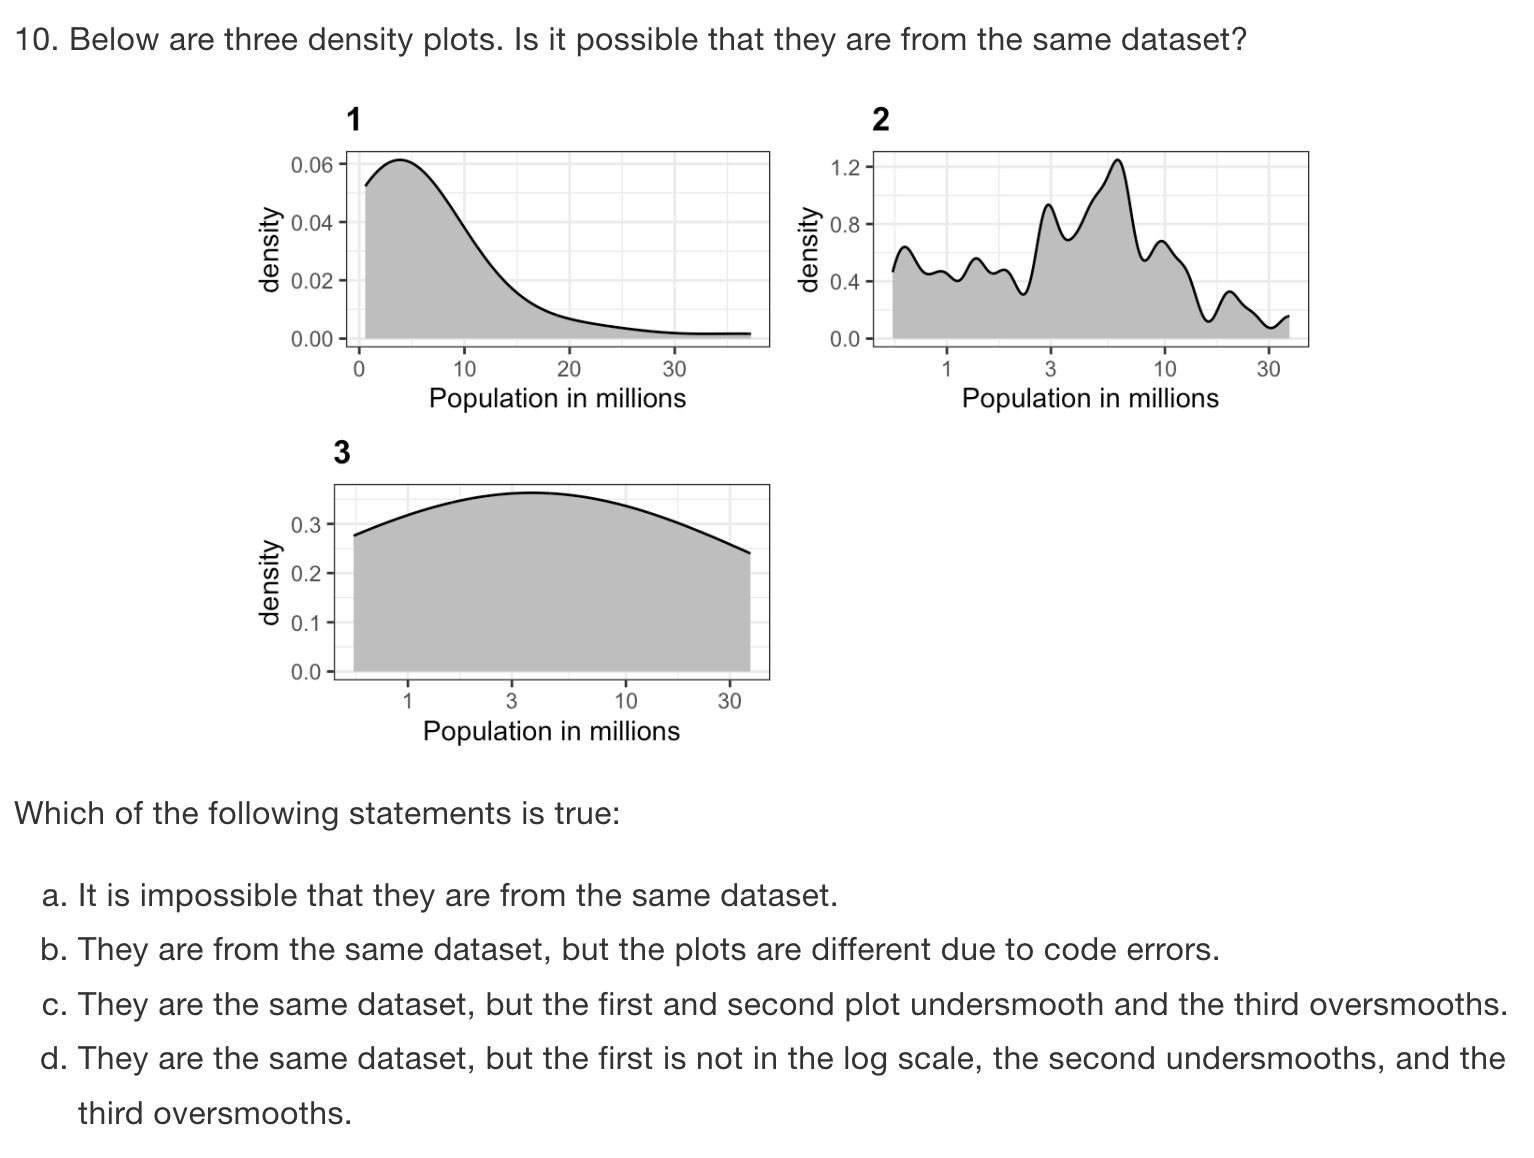

**RESPOSTA**

Alternativa **(d)**

# 12.8)

#### 1) 

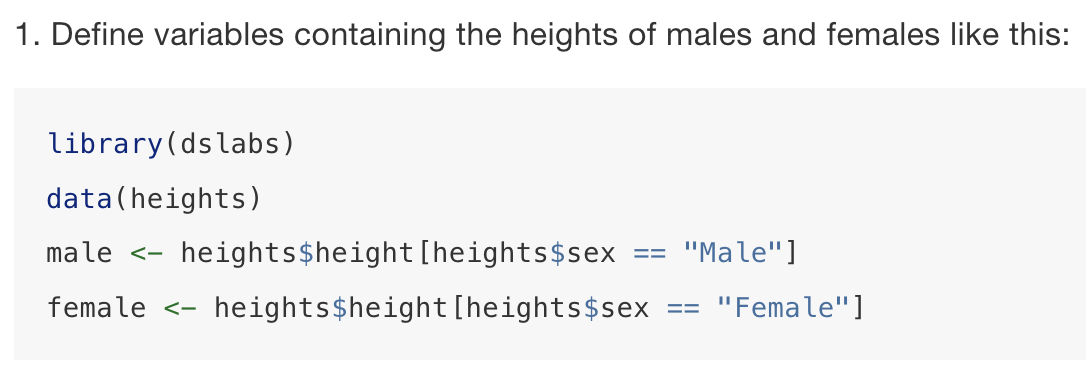



In [21]:
# Importando dataset heights

url = "https://vincentarelbundock.github.io/Rdatasets/csv/dslabs/heights.csv"

df_heights = pd.read_csv(url)

display(df_heights.head())

male = df_heights.loc[df_heights.sex=='Male', 'height']
female = df_heights.loc[df_heights.sex=='Female', 'height']

print(f"Número de amostras: Male -> {male.shape[0]}, Female -> {female.shape[0]}")

,rownames,sex,height
0,1,Male,75.0
1,2,Male,70.0
2,3,Male,68.0
3,4,Male,74.0
4,5,Male,61.0


Número de amostras: Male -> 812, Female -> 238


#### 2)

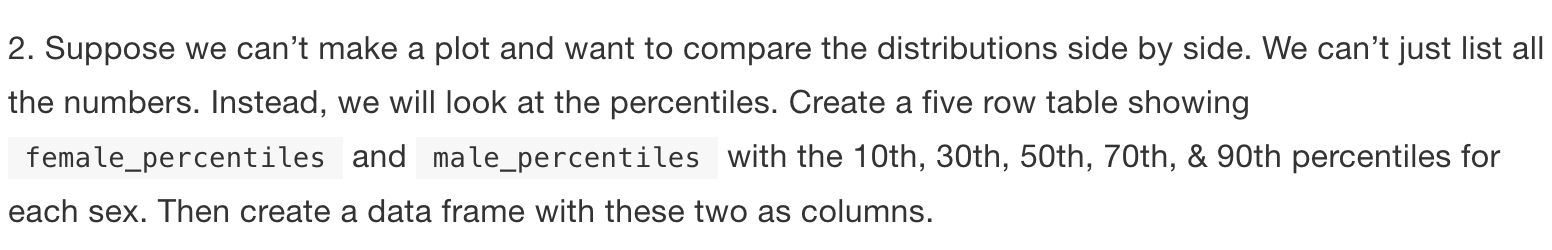

In [25]:
# Calcula os percentis 10, 30, 50, 70 e 90 para homens e mulheres
percentis = np.array([10, 30, 50, 70, 90]) / 100.0

percentis_male = male.quantile(percentis)
percentis_female = female.quantile(percentis)

# Cria um dataframe com os percentis
df_percentis = pd.DataFrame({
    'Percentil': percentis * 100,
    'Male': percentis_male.values,
    'Female': percentis_female.values
})

df_percentis.set_index('Percentil', inplace=True)

df_percentis


,Male,Female
Percentil,,
10.0,65.000000,61.000000
30.0,68.000000,63.000000
50.0,69.000000,64.980315
70.0,71.000000,66.464170
90.0,73.227512,69.000000


#### 3)

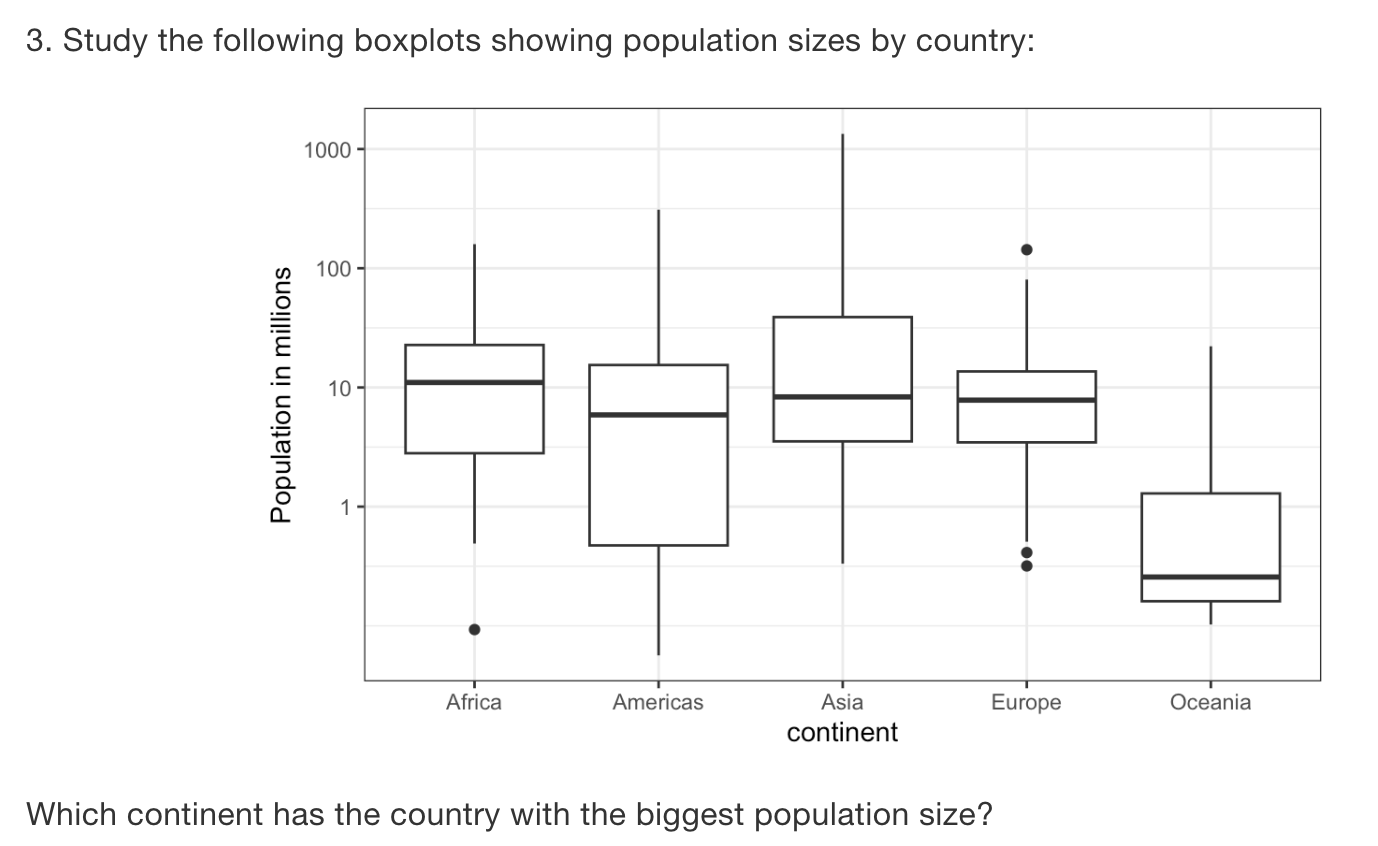

**RESPOSTA:**

O enunciado não menciona o dataset utilizado na confecção deste gráfico, portando tomarei apenas a figura acima como base na resolução dos exercícios de 3 a 7

O continente com o maior país é a Ásia, uma vez que este possui o boxplot com o maior "bigode", que, como é de conhecimento popular, certamente é composto por países como China e Índia.

#### 4)

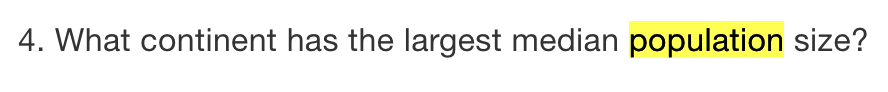

**RESPOSTA:**

O continente de maior mediana é a Ásia, uma vez que seu boxplot é o que possui a linha do meio na posição mais elevada.

#### 5)

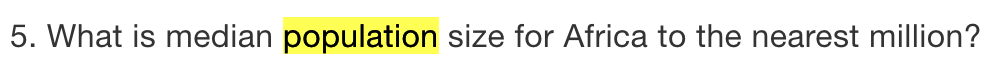

**RESPOSTA:**

A população mediana da África arredondada para o primeiro milhão mais próximo é de 10 milhões.

#### 6)

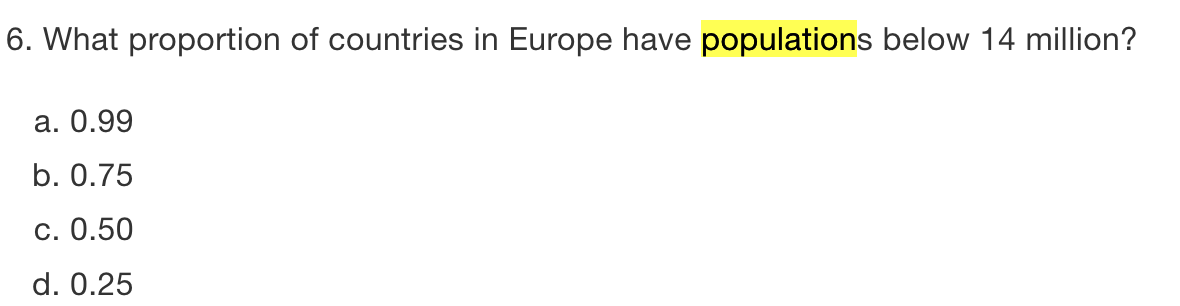

**RESPOSTA**

A proporção de países da Europa com abaixo de 14 milhões de indivíduos é de cerca de 75%, uma vez que 14 milhões coincide com o terceiro quartil. Portanto, a resposta correta é a alternativa **(b)**

#### 7)

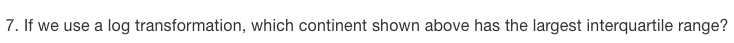

**RESPOSTA:**

O continente com maior intervalo interquartil (escala logaritmica) é a ásia, cujo terceiro quartil está por volta de 50 milhões de habitantes e o primeiro quartil, cerca de 5 milhões.

#### 8)

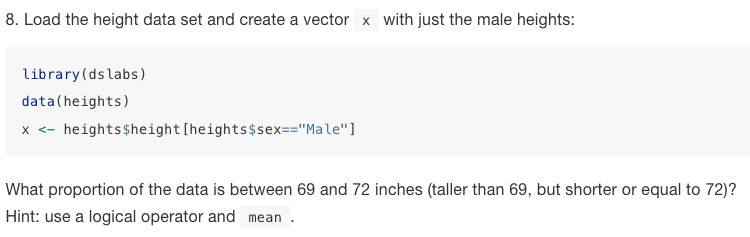

**RESPOSTA:**

In [54]:
x = df_heights.loc[df_heights.sex == 'Male', 'height']

# Para encontrar a proporção de dados entre 69 e 72 polegadas, basta contar quantos
# elementos estão entre 69 e 72 e dividir pelo total de elementos no dataset
prop = ((x > 69.0) & (x <= 72.0)).mean()
print(f"A proporção de dados entre 69 e 72 polegadas é {prop}")


A proporção de dados entre 69 e 72 polegadas é 0.33374384236453203


#### 9)

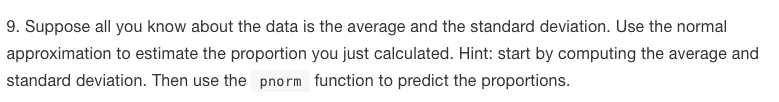

**RESPOSTA:**

In [53]:
from scipy.stats import norm

# Calcula a média e desvio padrão
avg = x.mean()
std = x.std()

# Calcula a CDF para os limites inferior e superior
cdf_69 = norm.cdf(69, loc=avg, scale=std)
cdf_72 = norm.cdf(72, loc=avg, scale=std)

# Calcula a proporção de dados entre 69 e 72
proporcao = cdf_72 - cdf_69

print(f"A proporção de dados entre 69 e 72 é: {proporcao:.4f}")




A proporção de dados entre 69 e 72 é: 0.3062


#### 10)

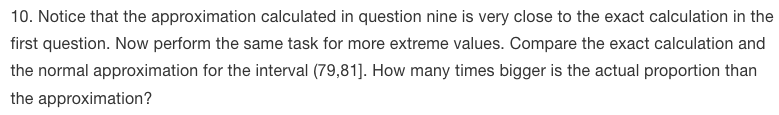

**RESPOSTA:**

In [59]:
# Calcula a proporçao de dados no intervado (79,81]
prop = ((x > 79.0) & (x <= 81.0)).mean()

print(f"A proporção real de dados no intervalo (79, 81] é {prop:.4f}")

# Estimando a proporção de dados no intervalo (79, 81] usando a distribuição normal
cdf_79 = norm.cdf(79, loc=avg, scale=std)
cdf_81 = norm.cdf(81, loc=avg, scale=std)

proporcao = cdf_81 - cdf_79

print(f"A proporção estimada de dados no intervalo (79, 81] é {proporcao:.4f}")

times_bigger = prop / proporcao

print(f"O valor real é {times_bigger:.2f} vezes maior que o valor estimado")

A proporção real de dados no intervalo (79, 81] é 0.0049
A proporção estimada de dados no intervalo (79, 81] é 0.0031
O valor real é 1.61 vezes maior que o valor estimado


#### 11)

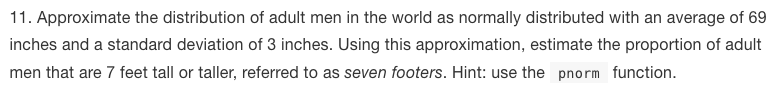

**RESPOSTA:**

In [75]:
avg = 69.0
std = 3.0

# 7 feet = 84 inches
# Calcula a CDF para 84 polegadas
cdf_84 = norm.cdf(84.0, loc=avg, scale=std)

# Calcula a proporção de pessoas com mais de 7 pés

prop = 1 - cdf_84

print(f"A proporção estimada de pessoas com mais de  7 pés é {prop:.10f}")

A proporção estimada de pessoas com mais de  7 pés é 0.0000002867


#### 12)

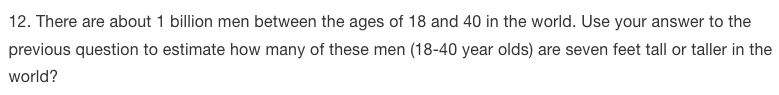

**RESPOSTA:**

In [76]:
# Múltiplica a proporção por 1 bilhão para obter o número de pessoas entre 18 e 40 anos no mundo
populacao = 7.8e9
prop = prop * populacao

print(f"O número estimado de pessoas com mais de 7 pés no mundo é {prop:.0f}")

O número estimado de pessoas com mais de 7 pés no mundo é 2236


#### 13)

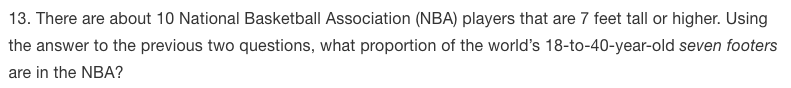

**RESPOSTA:**

In [77]:
jogadores_nba = 10.0

# Calcula a proporção de jogadores na NBA acima de 7 pés em relacao ao número total de pessoas entre 18 e 40 anos
prop_nba = jogadores_nba / prop * 100

print(f"A proporção de jogadores na NBA acima de 7 pés é {prop_nba:.10f}% em relação ao número total de pessoas entre 18 e 40 anos")

A proporção de jogadores na NBA acima de 7 pés é 0.4472507419% em relação ao número total de pessoas entre 18 e 40 anos


#### 14)

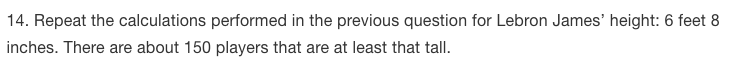

**RESPOSTA:**

In [78]:
# 6 feet + 8 inches = 80 inches

avg = 69.0
std = 3.0

# Calcula a CDF para 80 polegadas
cdf_80 = norm.cdf(80.0, loc=avg, scale=std)

# Calcula a proporção de pessoas com mais de 6 pés e 8 polegadas
prop = 1 - cdf_80

print(f"A proporção estimada de pessoas com mais de 6 pés e 8 polegadas é {prop:.10f}")

# Múltiplica a proporção por 1 bilhão para obter o número de pessoas entre 18 e 40 anos no mundo
populacao = 7.8e9
prop = prop * populacao

print(f"O número estimado de pessoas com mais de 6 pés e 8 polegadas no mundo é {prop:.0f}")

jogadores_nba = 150.0

# Calcula a proporção de jogadores na NBA acima de 6 pés e 8 polegadas em relacao ao número total de pessoas entre 18 e 40 anos

prop_nba = jogadores_nba / prop * 100

print(f"A proporção de jogadores na NBA acima de 6 pés e 8 polegadas é {prop_nba:.10f}% em relação ao número total de pessoas entre 18 e 40 anos")


A proporção estimada de pessoas com mais de 6 pés e 8 polegadas é 0.0001228664
O número estimado de pessoas com mais de 6 pés e 8 polegadas no mundo é 958358
A proporção de jogadores na NBA acima de 6 pés e 8 polegadas é 0.0156517736% em relação ao número total de pessoas entre 18 e 40 anos


#### 15)

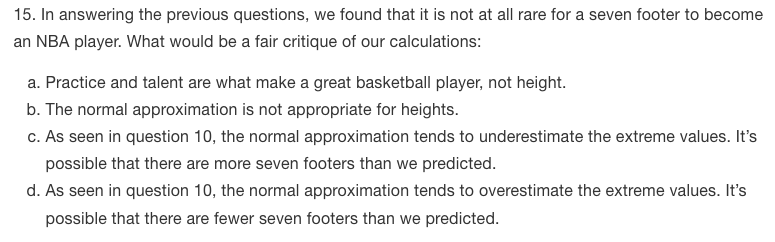

**RESPOSTA:**

A modelagem através da distribuição normal tende a subestimar valores extremos, portanto a alternativa correta é a **(c)**.